In [1]:
import numpy as np
import matplotlib.pyplot as plt

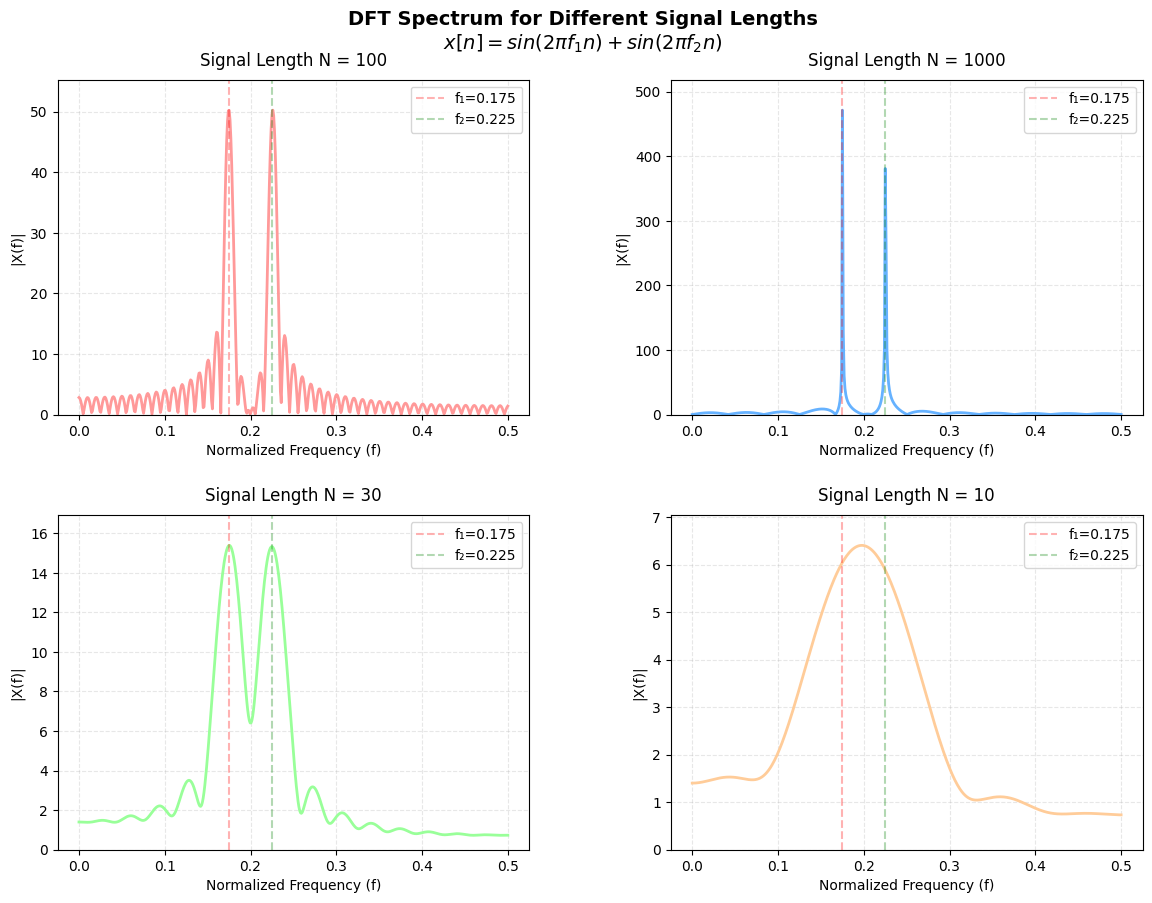

In [38]:
f_1 = 7/40
f_2 = 9/40

def x(n):
    return np.sin(2 * np.pi * f_1 * n) + np.sin(2 * np.pi * f_2 * n)


X_f_100 = np.fft.fft(x(np.arange(100)), 1024)
X_f_1000 = np.fft.fft(x(np.arange(1000)), 1024)
X_f_30 = np.fft.fft(x(np.arange(30)), 1024)
X_f_10 = np.fft.fft(x(np.arange(10)), 1024)

a_100 = len(X_f_100)//2
a_1000 = len(X_f_1000)//2
a_30 = len(X_f_30)//2
a_10 = len(X_f_10)//2

f_100 = np.linspace(0, 0.5, a_100)
f_1000 = np.linspace(0, 0.5, a_1000)
f_30 = np.linspace(0, 0.5, a_30)
f_10 = np.linspace(0, 0.5, a_10)

# Create figure with subplots and extra space for title
fig = plt.figure(figsize=(14, 10))
fig.suptitle('DFT Spectrum for Different Signal Lengths\n$x[n] = sin(2\pi f_1n) + sin(2\pi f_2n)$', 
             fontsize=14, fontweight='bold', y=0.95)

# Create subplot grid with proper spacing
gs = fig.add_gridspec(2, 2, hspace=0.3, wspace=0.3)
ax = gs.subplots()

# Nice colors for the plots
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']

# Data to plot
lengths = [100, 1000, 30, 10]
X_fs = [X_f_100, X_f_1000, X_f_30, X_f_10]
f_axes = [f_100, f_1000, f_30, f_10]
a_vals = [a_100, a_1000, a_30, a_10]

# Plot each subplot
for idx, (N, X_f, f, a) in enumerate(zip(lengths, X_fs, f_axes, a_vals)):
    row, col = idx // 2, idx % 2
    
    # Plot magnitude spectrum
    ax[row, col].plot(f, np.abs(X_f[:a]), color=colors[idx], linewidth=2)
    
    # Add vertical lines at the signal frequencies
    ax[row, col].axvline(x=f_1, color='red', alpha=0.3, linestyle='--', label=f'f₁={f_1:.3f}')
    ax[row, col].axvline(x=f_2, color='green', alpha=0.3, linestyle='--', label=f'f₂={f_2:.3f}')
    
    # Customize plot appearance
    ax[row, col].grid(True, alpha=0.3, linestyle='--')
    ax[row, col].set_xlabel('Normalized Frequency (f)', fontsize=10)
    ax[row, col].set_ylabel('|X(f)|', fontsize=10)
    ax[row, col].set_title(f'Signal Length N = {N}', fontsize=12, pad=10)
    ax[row, col].legend(loc='upper right')
    
    # Set y-axis limits for better visualization
    ax[row, col].set_ylim(0, max(np.abs(X_f[:a])) * 1.1)
    
    # Set x-axis ticks
    ax[row, col].set_xticks(np.linspace(0, 0.5, 6))
    
    # Add minor grid for better readability
    ax[row, col].grid(True, which='minor', alpha=0.1)


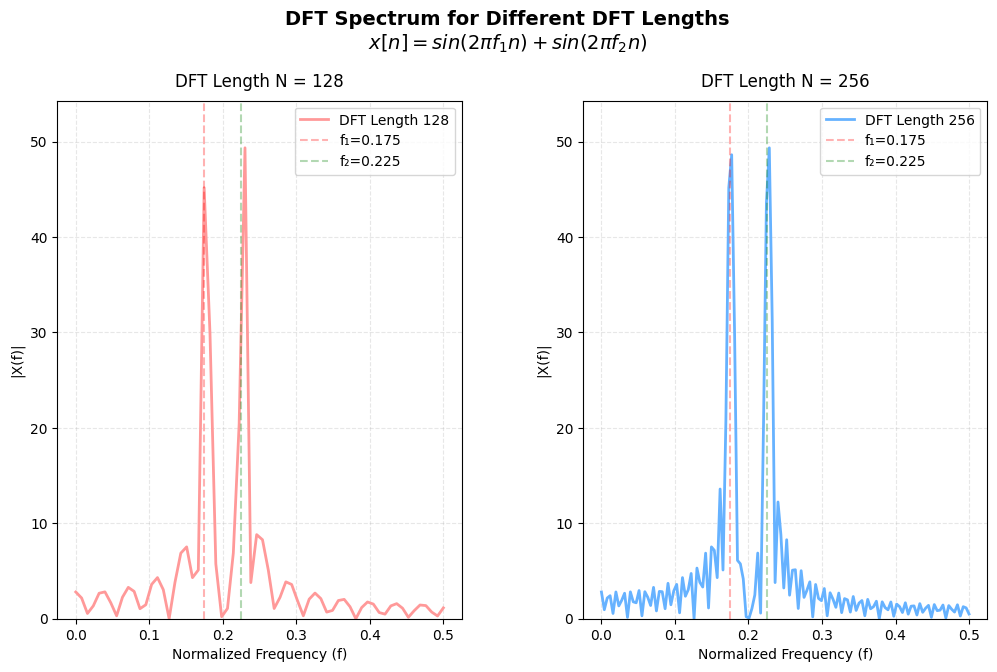


Observations:
• Both plots show the same signal (N=100 samples) but with different DFT lengths
• Higher DFT length (N=256) provides better frequency resolution
• True frequencies: f₁=0.175 and f₂=0.225
• Vertical lines mark the true frequency components


In [42]:
#Task 2C:

f_1 = 7/40
f_2 = 9/40

def x(n):
    return np.sin(2 * np.pi * f_1 * n) + np.sin(2 * np.pi * f_2 * n)

X_f_128 = np.fft.fft(x(np.arange(100)), 128)
X_f_256 = np.fft.fft(x(np.arange(100)), 256)

a_128 = len(X_f_128)//2
a_256 = len(X_f_256)//2

f_128 = np.linspace(0, 0.5, a_128)
f_256 = np.linspace(0, 0.5, a_256)

# Create figure with subplots and extra space for title
fig = plt.figure(figsize=(12, 7))

# Create subplot grid with proper spacing
gs = fig.add_gridspec(1, 2, wspace=0.3, top=0.85)

# Add main title with proper spacing
fig.suptitle('DFT Spectrum for Different DFT Lengths\n$x[n] = sin(2\pi f_1n) + sin(2\pi f_2n)$', 
             fontsize=14, fontweight='bold', y=0.98)
ax = gs.subplots()

# Plot data
for idx, (N_dft, X_f, f, a) in enumerate([(128, X_f_128, f_128, a_128), 
                                         (256, X_f_256, f_256, a_256)]):
    # Plot magnitude spectrum
    ax[idx].plot(f, np.abs(X_f[:a]), color=['#FF9999', '#66B2FF'][idx], 
                 linewidth=2, label=f'DFT Length {N_dft}')
    
    # Add vertical lines at the signal frequencies
    ax[idx].axvline(x=f_1, color='red', alpha=0.3, linestyle='--', label=f'f₁={f_1:.3f}')
    ax[idx].axvline(x=f_2, color='green', alpha=0.3, linestyle='--', label=f'f₂={f_2:.3f}')
    
    # Customize plot appearance
    ax[idx].grid(True, alpha=0.3, linestyle='--')
    ax[idx].set_xlabel('Normalized Frequency (f)', fontsize=10)
    ax[idx].set_ylabel('|X(f)|', fontsize=10)
    ax[idx].set_title(f'DFT Length N = {N_dft}', fontsize=12, pad=10)
    ax[idx].legend(loc='upper right')
    
    # Set y-axis limits for better visualization
    ax[idx].set_ylim(0, max(np.abs(X_f[:a])) * 1.1)
    
    # Set x-axis ticks
    ax[idx].set_xticks(np.linspace(0, 0.5, 6))
    
    # Add minor grid for better readability
    ax[idx].grid(True, which='minor', alpha=0.1)

plt.show()

# Print observations
print("\nObservations:")
print("="*70)
print("• Both plots show the same signal (N=100 samples) but with different DFT lengths")
print("• Higher DFT length (N=256) provides better frequency resolution")
print(f"• True frequencies: f₁={f_1:.3f} and f₂={f_2:.3f}")
print("• Vertical lines mark the true frequency components")